## Car Brand Predictor using Keras

Used ResNet50 keras application and data is generated from google search  

In [1]:
# importing libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [29]:
# resizing all the images
IMAGE_SIZE = [224, 224]
# setting file path for training and testing
train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [30]:
# Importing the ResNet50 library and adding preprocessing layer to the front of ResNet50
# Using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [31]:
# Not training existing weights
for layer in resnet.layers:
    layer.trainable = False

In [32]:
# getting number of output classes in our dataset folder
folders = glob('Datasets/train/*')

In [33]:
# Flattening the out of resnet
x = Flatten()(resnet.output)

In [34]:
#Creating the output layer
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [35]:
# viewing the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

#### Last layer has 4 outputs and input layer is images

In [36]:
# Using cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [37]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# creating training dataset
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 115 images belonging to 4 classes.


In [39]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 74 images belonging to 4 classes.


In [40]:
# fitting data to model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Atul\AppData\Local\Temp\ipykernel_6680\928474060.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
4/4 [==============================] - 29s 7s/step - loss: 12.2247 - accuracy: 0.2087 - val_loss: 6.1356 - val_accuracy: 0.2162
Epoch 2/50
4/4 [==============================] - 23s 6s/step - loss: 5.7017 - accuracy: 0.2435 - val_loss: 9.8534 - val_accuracy: 0.2568
Epoch 3/50
4/4 [==============================] - 23s 6s/step - loss: 5.2647 - accuracy: 0.3565 - val_loss: 4.6231 - val_accuracy: 0.4054
Epoch 4/50
4/4 [==============================] - 23s 7s/step - loss: 3.2228 - accuracy: 0.3652 - val_loss: 4.0835 - val_accuracy: 0.2027
Epoch 5/50
4/4 [==============================] - 23s 6s/step - loss: 2.1182 - accuracy: 0.3217 - val_loss: 2.7345 - val_accuracy: 0.4189
Epoch 6/50
4/4 [==============================] - 23s 7s/step - loss: 2.5178 - accuracy: 0.4348 - val_loss: 3.1784 - val_accuracy: 0.2703
Epoch 7/50
4/4 [==============================] - 23s 6s/step - loss: 1.8850 - accuracy: 0.4522 - val_loss: 1.3028 - val_accuracy: 0.4865
Epoch 8/50
4/4 [=================

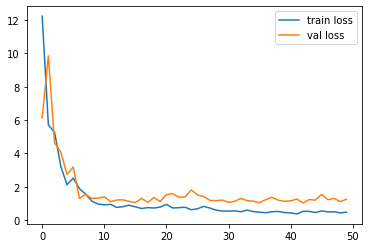

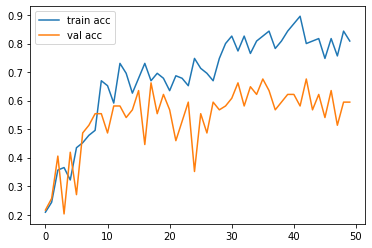

<Figure size 432x288 with 0 Axes>

In [41]:
# ploting the both losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Since there is large difference in validation accuracy and accuracy values, So added more images to traing datasets

In [42]:
# saving the as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [43]:
#predicting 4 classes
y_pred = model.predict(test_set)


3/3 [==============================] - 10s 2s/step


In [47]:
y_pred

array([[3.73043448e-01, 4.77311909e-01, 1.25465825e-01, 2.41788868e-02],
       [3.42805773e-01, 1.30664274e-01, 3.71330470e-01, 1.55199468e-01],
       [3.51901740e-01, 1.15594007e-01, 2.09114864e-01, 3.23389471e-01],
       [9.77701768e-02, 2.82439381e-01, 5.11287332e-01, 1.08503126e-01],
       [3.56363840e-02, 8.43997598e-01, 8.42621103e-02, 3.61038335e-02],
       [6.96080148e-01, 2.35316664e-01, 1.91786215e-02, 4.94245254e-02],
       [3.30208313e-05, 6.59045996e-03, 9.93367136e-01, 9.36697143e-06],
       [2.12041229e-01, 2.60193348e-01, 2.17769027e-01, 3.09996367e-01],
       [1.51085039e-03, 9.98412609e-01, 7.13922636e-05, 5.07265440e-06],
       [9.50436950e-01, 2.91037615e-02, 1.85587704e-02, 1.90047128e-03],
       [7.13901641e-03, 9.68420982e-01, 2.44234223e-02, 1.65408564e-05],
       [2.20932495e-02, 9.16571081e-01, 5.13460077e-02, 9.98968259e-03],
       [7.29185879e-01, 2.09172234e-01, 5.92667349e-02, 2.37514195e-03],
       [3.72207522e-01, 5.27405620e-01, 7.16767311e

In [48]:
# Highest prediction value will be the predicted class index
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_pred

array([1, 2, 0, 2, 1, 0, 2, 3, 1, 0, 1, 1, 0, 1, 2, 3, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 3, 0, 2,
       0, 0, 1, 0, 3, 1, 0, 1], dtype=int64)

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
#Loading the model
model=load_model('model_resnet50.h5')

### Testing the model

In [92]:
# Taking image from test dataset to test
img=image.load_img('Datasets/Test/lamborghini/4.jpg',target_size=(224,224))


In [93]:
# Image to array
x=image.img_to_array(img)
x

array([[[124., 115., 108.],
        [ 85.,  76.,  69.],
        [112., 103.,  96.],
        ...,
        [221., 224., 229.],
        [224., 227., 232.],
        [231., 234., 239.]],

       [[130., 121., 114.],
        [ 90.,  81.,  74.],
        [116., 107., 100.],
        ...,
        [221., 224., 229.],
        [225., 228., 233.],
        [233., 236., 241.]],

       [[137., 128., 121.],
        [ 94.,  85.,  78.],
        [118., 109., 102.],
        ...,
        [221., 224., 229.],
        [228., 231., 236.],
        [235., 238., 243.]],

       ...,

       [[192., 183., 178.],
        [190., 181., 176.],
        [188., 179., 174.],
        ...,
        [230., 226., 227.],
        [232., 232., 232.],
        [232., 232., 232.]],

       [[189., 180., 175.],
        [188., 179., 174.],
        [186., 177., 172.],
        ...,
        [230., 226., 227.],
        [232., 232., 232.],
        [232., 232., 232.]],

       [[190., 181., 176.],
        [189., 180., 175.],
        [187., 1

In [94]:
x.shape

(224, 224, 3)

In [95]:
#re-scaling the testing image
x=x/255

In [96]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [97]:
model.predict(img_data)

1/1 [==============================] - 0s 164ms/step


array([[1.9304959e-02, 5.4077256e-01, 4.3982384e-01, 9.8638353e-05]],
      dtype=float32)

In [98]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 159ms/step


In [99]:
# Checking if the image belongs to lamborgini
a==1

array([ True])